In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('./clustering_df.csv');

In [9]:
df

,pca_0,pca_1,pca_2
0,0.256332,0.150150,0.345492
1,0.234291,0.138619,0.324007
2,0.252762,0.146195,0.337321
3,0.223684,0.197239,0.339346
4,0.240676,0.117453,0.320155
...,...,...,...
7190,0.396651,0.022959,0.350851
7191,0.407859,0.022222,0.327780
7192,0.414867,0.019173,0.343664
7193,0.396441,0.033071,0.341143


In [10]:
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import silhouette_score

In [11]:
inits = ['k-means++', 'random']
clusters = range(4,11)
colors = np.array(["blue", "green", "cyan", "yellow", "orange", "red", "turquoise", "lime", "pink", "purple"])
inertias = []
silhouettes = []
best_model = None
best_score = float('-inf')
best_inertia = float('inf')

In [12]:
for cluster in clusters:
  for init in inits:
    kmeans = KMeans(n_clusters=cluster, init=init, n_init='auto')
    kmeans.fit(df)

    score = silhouette_score(df, kmeans.labels_)
    if init == 'k-means++':
      inertias.append(kmeans.inertia_)
      silhouettes.append(score)

    #if score > best_score and kmeans.inertia_ < best_inertia:
     # best_score = score
      #best_model = kmeans
      #best_inertia = kmeans.inertia_ 

    fig = px.scatter_3d(x=df['pca_0'], y=df['pca_1'], z=df['pca_2'], color=colors[kmeans.labels_])
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'K-means++ inertia values')

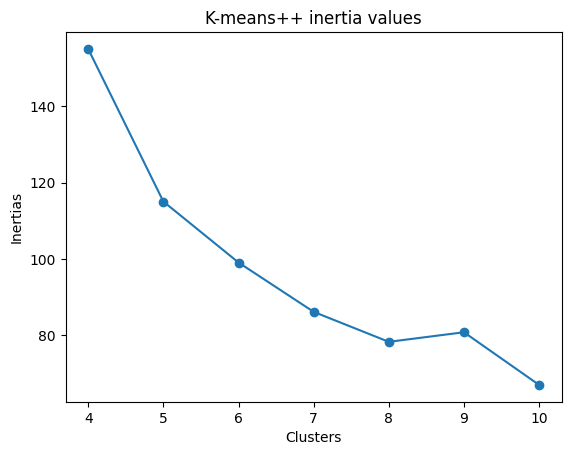

In [13]:
plt.plot(clusters, inertias, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.title('K-means++ inertia values')

In [14]:
silhouettes

[0.5099598669502953,
 0.5071846152829821,
 0.3710573248049738,
 0.4105532055548643,
 0.392456392613269,
 0.3439203783083905,
 0.3729749812968276]

Text(0.5, 1.0, 'K-means++ silhouette values')

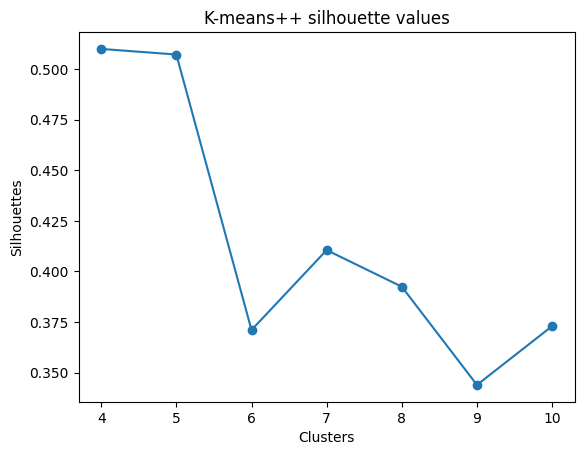

In [15]:
plt.plot(clusters, silhouettes, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Silhouettes')
plt.title('K-means++ silhouette values')

In [16]:
best_model.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'random',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [19]:
best_model.inertia_

152.93794490025923

In [17]:
import os
import pickle

In [25]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init='auto')
kmeans.fit(df)

KMeans(n_clusters=7, n_init='auto')

In [26]:
silhouette_score(df, kmeans.labels_)

0.4760723648023165

In [27]:
output_directory = '../models/clustering/'

name = 'KMEANS_model.pkl'
try:
  with open(os.path.join(output_directory, name), 'wb') as file:
    pickle.dump(kmeans, file)
except IOError as err:
  print('Error while exporting model \'{}\''.format(name.split('.')[0]))
  print(err)